In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import warnings
warnings.simplefilter('ignore')

## 합계 출산율 데이터 로드

In [7]:
df1 = pd.read_excel('../../data/dataset/stat_142801.xls',skiprows=2,nrows=2,index_col=0)
df1

,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


In [9]:
df1.index

Index(['출생아 수', '합계 출산율'], dtype='object')

In [10]:
df1.index.values

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [16]:
df1.rename(index={"출생아\xa0수":"출생아 수",'합계\xa0출산율':'합계 출산율'}, inplace=True)

In [17]:
df1.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

#### 행/열 변경 : df.T or df.transpose

In [21]:
df1 = df1.T
df1

,출생아 수,합계 출산율
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.840


### 시각화

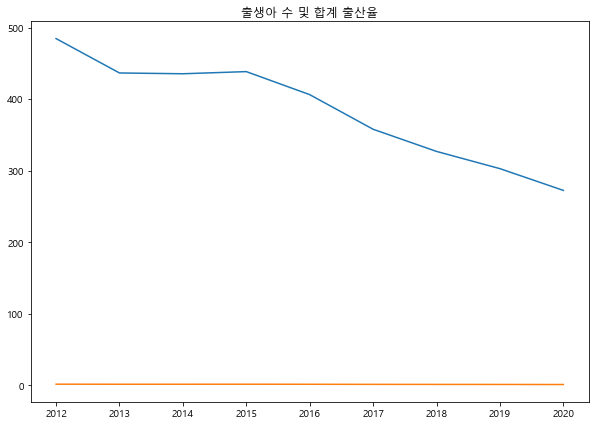

In [26]:
plt.figure(figsize=(10,7))
plt.plot(df1.index, df1['출생아 수'])
plt.plot(df1.index, df1['합계 출산율'])
plt.title('출생아 수 및 합계 출산율')
plt.show()

## 오른쪽 축 설정

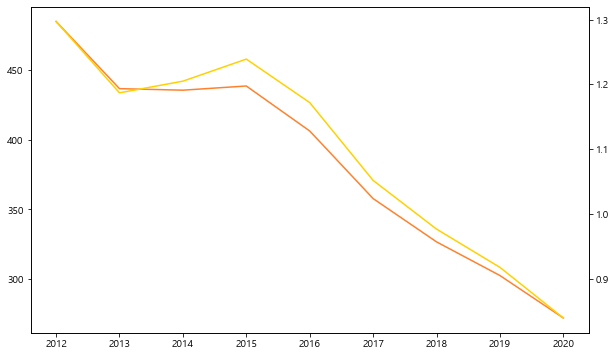

In [28]:
fig, axes = plt.subplots(figsize=(10,6))
axes.plot(df1.index, df1['출생아 수'],color='#ff812d')

# x 축 공유
axes2 = axes.twinx()
axes2.plot(df1.index, df1['합계 출산율'], color='#ffd100')
plt.show()

### 출생아 수 - 막대, 합계 출산율 - 라인

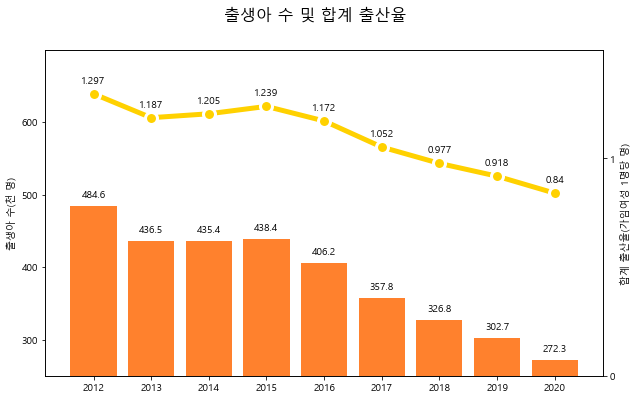

In [47]:
fig, axes = plt.subplots(figsize=(10,6))
axes.bar(df1.index, df1['출생아 수'],color='#ff812d')
axes.set_ylim(250,700)
axes.set_yticks([300,400,500,600])
axes.set_ylabel('출생아 수(천 명)')

# 막대 위 텍스트
for idx, val in enumerate(df1['출생아 수']):
    axes.text(idx, val+12, val, ha='center')


# x 축 공유
axes2 = axes.twinx()
axes2.plot(df1.index, df1['합계 출산율'], color='#ffd100', marker='o', ms=12, lw=5, mew=3, mec='w')
axes2.set_ylim(0,1.5)
axes2.set_yticks([0,1])
axes2.set_ylabel('합계 출산율(가임여성 1명당 명)')

# 막대 위 텍스트
for idx, val in enumerate(df1['합계 출산율']):
    axes2.text(idx, val+0.05, val, ha='center')
    
fig.suptitle('출생아 수 및 합계 출산율', fontsize='16')
    
plt.show()